In [1]:
from sympy import *
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

%matplotlib inline


init_session()

IPython console for SymPy 1.8 (Python 3.6.13-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [19]:
df=pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=[r'a', 'b', 'c'])

df.where(df['a']>1).dropna()
# df
# df.where?
df = dic['tabla'][:-1]
df.iloc[df['f_i'].idxmax(),:]['x_i']

tabla = dic['tabla']
t=tabla[:-1]
tabla[:-1].where(tabla[:-1]['%A_i']>50).dropna().iloc[0]['x_i']


In [5]:
def analisis_discreto(str_datos):
    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'h_i':np.unique(datos, return_counts=True)[1]/len(datos), 'H_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    tabla.reset_index(inplace=True)
    tabla.loc['suma']=tabla.sum()
    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    fg, ax = plt.subplots()
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama")
#     fg=plt.figure

    
#     solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
#     solucion.append({"P70":np.percentile(datos,70), "Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75),"D4":np.percentile(datos,40),})
#     solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
#     display(tabla, solucion[2] , solucion[3], solucion[4])
    dic=dict()
    dic['datos']=datos
    dic['tabla']=tabla
    dic['figure']=fg
    return  dic



,x_i,f_i,F_i,h_i,H_i,%_i,%A_i
0,1,1,1,0.03,0.03,3.33%,3.33%
1,2,1,2,0.03,0.07,3.33%,6.67%
2,3,3,5,0.10,0.17,10.00%,16.67%
3,4,1,6,0.03,0.20,3.33%,20.00%
4,5,2,8,0.07,0.27,6.67%,26.67%
5,6,2,10,0.07,0.33,6.67%,33.33%
6,7,1,11,0.03,0.37,3.33%,36.67%
7,8,2,13,0.07,0.43,6.67%,43.33%
8,9,1,14,0.03,0.47,3.33%,46.67%
9,10,5,19,0.17,0.63,16.67%,63.33%


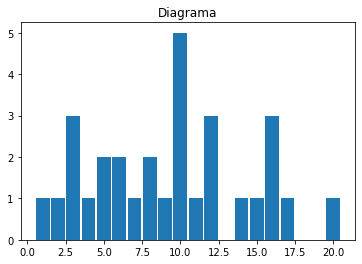

In [6]:
%matplotlib inline
dic=analisis_discreto( """16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12""")
# dic['tabla'].astype({"x_i":int, "f_i":int, "F_i":int}).style.format({'h_i':"{:,.2f}"})
dic['tabla'].astype({"x_i":int, "f_i":int, "F_i":int}).style.format({'h_i':"{:,.2f}",'H_i':"{:,.2f}",'%_i':"{:,.2f}%",'%A_i':"{:,.2f}%"})

In [13]:
p=20
(len(dic['datos'])+1)*p/100, np.percentile(dic['datos'],p,interpolation='linear')

In [29]:
np.__version__

'1.19.2'

In [2]:
def analisis_agrupado(str_datos, bin_size = 10 ):
    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    
    display(datos)
    
    #dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins=round((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))
    dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins = np.arange(5*int(datos.min()/5), 5*(int(datos.max()/5)+1)+bin_size,bin_size))

    display(dfrec, dagr, )

    display([dagr[i]+bin_size/2 for i in range(len(dagr)-1)])

    marca = [dagr[i]+bin_size/2 for i in range(len(dagr)-1)]

    datos2=[]
    [datos2.append(np.ones(j)*marca[i]) for i, j in enumerate(dfrec) ]
    #datos2.append([np.ones(j)*marca[i] for i, j in enumerate(dfrec) ])


    datos2 = np.concatenate(datos2)
    display(datos2)
    datos = datos2
    display(5*int(datos.min()/5),5*(int(datos.max()/5)+1),int((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))

    #display(np.array(datos2))

    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'r_i':np.unique(datos, return_counts=True)[1]/len(datos), 'R_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Histograma")
    fg=plt.figure
    
    dic=dict()
    dic['datos']=datos
    dic['tabla']=tabla
    dic['figure']=fg


#     solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
#     solucion.append({"Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75)})
#     solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
#     display(tabla, solucion[2] , solucion[3], solucion[4])
    return  dic

array([174, 157, 168, 166, 169, 168, 173, 184, 176, 171, 172, 168, 167,
       162, 162, 163, 166, 166, 167, 167, 174, 159, 170, 172, 173, 164,
       161, 163, 176, 177])

array([ 8, 18,  4])

array([155, 165, 175, 185])

array([160., 160., 160., 160., 160., 160., 160., 160., 170., 170., 170.,
       170., 170., 170., 170., 170., 170., 170., 170., 170., 170., 170.,
       170., 170., 170., 170., 180., 180., 180., 180.])

{'datos': array([160., 160., 160., 160., 160., 160., 160., 160., 170., 170., 170.,
        170., 170., 170., 170., 170., 170., 170., 170., 170., 170., 170.,
        170., 170., 170., 170., 180., 180., 180., 180.]),
 'tabla':        f_i  F_i       r_i       R_i        %_i        %A_i
 x_i                                                       
 160.0    8    8  0.266667  0.266667  26.666667   26.666667
 170.0   18   26  0.600000  0.866667  60.000000   86.666667
 180.0    4   30  0.133333  1.000000  13.333333  100.000000,
 'figure': <function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>}

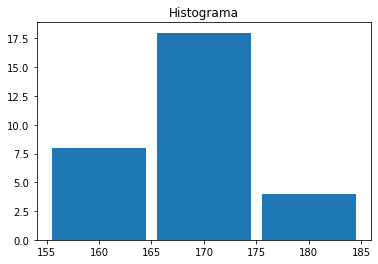

In [3]:
%matplotlib inline
str='174 157 168 166 169 168 173 184 176 171 172 168 167 162 162 163 166 166 167 167 174 159 170 172 173 164 161 163 176 177'
analisis_agrupado(str)

In [8]:
str
datos = np.loadtxt(str.split())
datos
bin_size=10
np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins = np.arange(5*int(datos.min()/5), 5*(int(datos.max()/5)+1)+bin_size,bin_size))


(array([ 8, 18,  4]), array([155, 165, 175, 185]))

In [22]:
str_datos ="""174
157 168 166 169 168 173 184 176 171 172 168 167 162 162
163
166 166 167 167 174 159 170 172 173 164 161 163 176 177"""
datos = np.loadtxt(str_datos.split())
datos

datos.min(), datos.max()

frec, interv = np.histogram(datos, range=(155,185), bins=3)
", ".join([latex(Interval.Ropen(interv[i],interv[i+1])) for i in range(len(interv)-1)])



'\\left[155.0, 165.0\\right), \\left[165.0, 175.0\\right), \\left[175.0, 185.0\\right)'